# Correlations

Calculate Pearson correlations between different cryptocurrencies.

In [1]:
import glob
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Read 1 minute time bars

In [2]:
TIME_BAR_DIR = '/data/bars/TimeBar/60000'

In [3]:
from utils import read_bars

def read_prices(csv_file: str)->pd.Series:
    TIME_BEGIN = pd.to_datetime('2020-06-07T00:00:00.000Z')
    TIME_END = pd.to_datetime('2020-06-30T00:00:00.000Z')
    bars_df = read_bars(csv_file)
    bars_df = bars_df[(bars_df['timestamp'] >= TIME_BEGIN) & (bars_df['timestamp'] < TIME_END)]

    prices = bars_df['volume_quote'] / bars_df['volume']
    filename = os.path.basename(csv_file)[len('TimeBar.60000.'):-len('.csv')]
    return prices.rename(filename)

In [4]:
def read_prices_all()->pd.DataFrame:
    csv_files = glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Binance.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.BitMEX.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.OKEx.*.csv') + \
                glob.glob(f'{TIME_BAR_DIR}/TimeBar.60000.Huobi.*.csv')
    csv_files = sorted(csv_files)
    prices_list = [read_prices(csv_file) for csv_file in csv_files]
    return pd.concat(prices_list, axis=1)

In [5]:
prices_df = read_prices_all()

In [6]:
prices_df

,Binance.Spot.ADA_USDT,Binance.Spot.ALGO_USDT,Binance.Spot.ATOM_USDT,Binance.Spot.BAT_USDT,Binance.Spot.BCH_USDT,Binance.Spot.BNB_USDT,Binance.Spot.BTC_USDT,Binance.Spot.DASH_USDT,Binance.Spot.EOS_USDT,Binance.Spot.ETC_USDT,...,OKEx.Swap.XLM_USD,OKEx.Swap.XLM_USDT,OKEx.Swap.XMR_USD,OKEx.Swap.XMR_USDT,OKEx.Swap.XRP_USD,OKEx.Swap.XRP_USDT,OKEx.Swap.XTZ_USD,OKEx.Swap.XTZ_USDT,OKEx.Swap.ZEC_USD,OKEx.Swap.ZEC_USDT
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-07 00:00:00+00:00,0.086182,NaN,3.054725,0.236939,253.206317,17.551612,9667.897456,NaN,2.799270,6.862009,...,NaN,NaN,NaN,NaN,0.203600,0.203600,NaN,NaN,NaN,NaN
2020-06-07 00:01:00+00:00,0.086188,NaN,3.056000,0.236931,253.146117,17.540896,9666.602700,78.315653,2.798773,6.860976,...,NaN,NaN,NaN,NaN,0.203500,NaN,NaN,NaN,52.939999,NaN
2020-06-07 00:02:00+00:00,0.086153,NaN,3.054372,0.236753,253.125122,17.544200,9662.098946,78.319293,2.797286,6.862173,...,NaN,NaN,NaN,NaN,0.203600,0.203769,NaN,NaN,NaN,NaN
2020-06-07 00:03:00+00:00,0.086188,NaN,3.054738,0.236719,253.037416,17.541393,9656.716486,78.313158,2.796905,6.864004,...,NaN,NaN,NaN,NaN,0.203786,0.203695,NaN,NaN,NaN,NaN
2020-06-07 00:04:00+00:00,0.086219,0.2372,3.057000,0.236786,252.958112,17.552629,9654.565756,78.327448,2.795778,6.863895,...,NaN,NaN,NaN,NaN,0.203600,0.203660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-29 23:55:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.065070,NaN,NaN,0.177300,0.177288,2.413,NaN,NaN,NaN
2020-06-29 23:56:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.065166,NaN,NaN,0.177347,0.177346,2.413,NaN,NaN,NaN
2020-06-29 23:57:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot correlations between different trading pairs in the same exchange

In [7]:
def plot_corrs_in_exchange(exchange: str, market_type: str, width: int=16)->None:
    prefix = f'{exchange}.{market_type}.'
    df = prices_df.filter(regex=prefix)
    df.columns = [col[len(prefix):] for col in df.columns.values]

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center=0, ax=ax).set_title(f'{exchange} {market_type}')

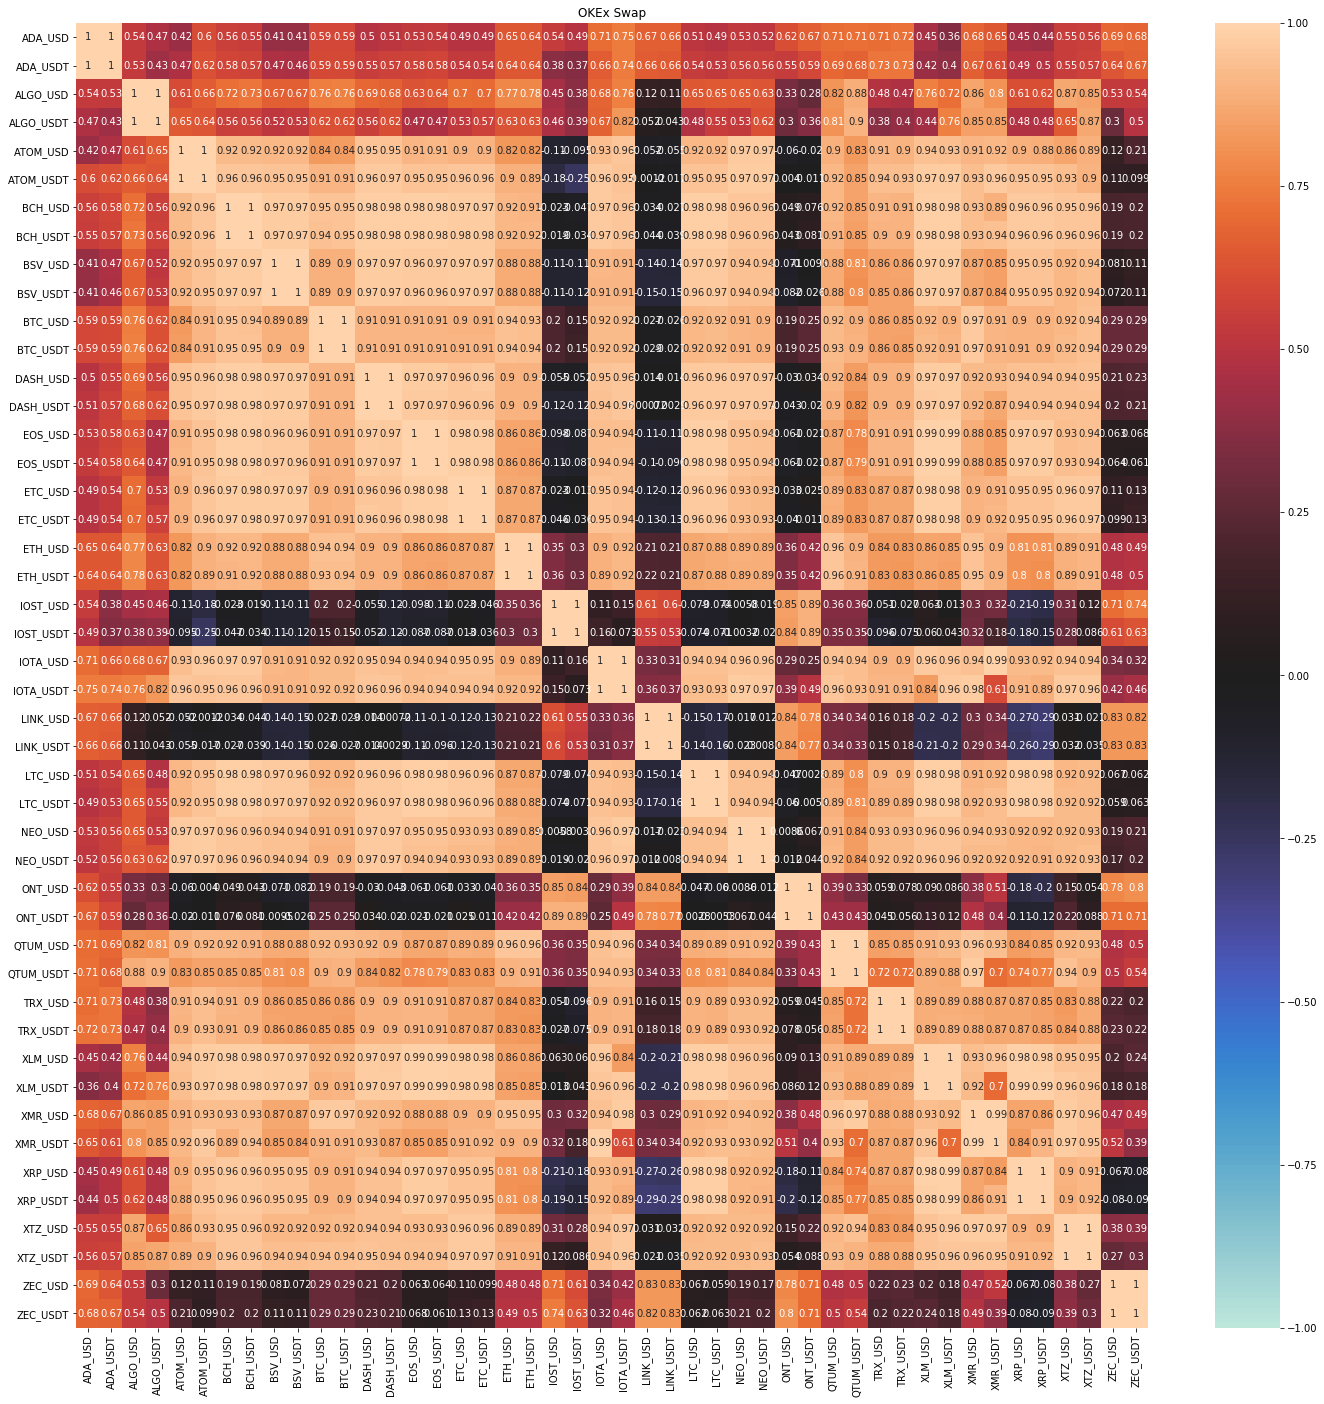

In [8]:
plot_corrs_in_exchange('OKEx', 'Swap', 24)

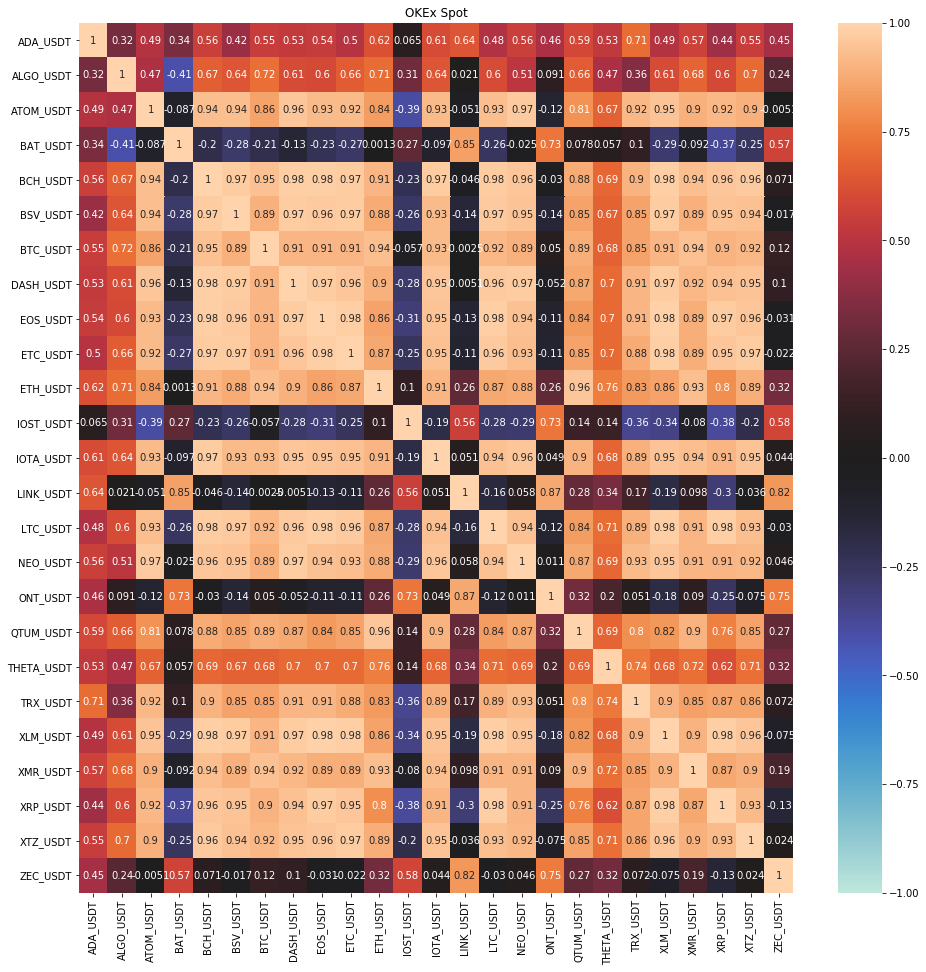

In [9]:
plot_corrs_in_exchange('OKEx', 'Spot')

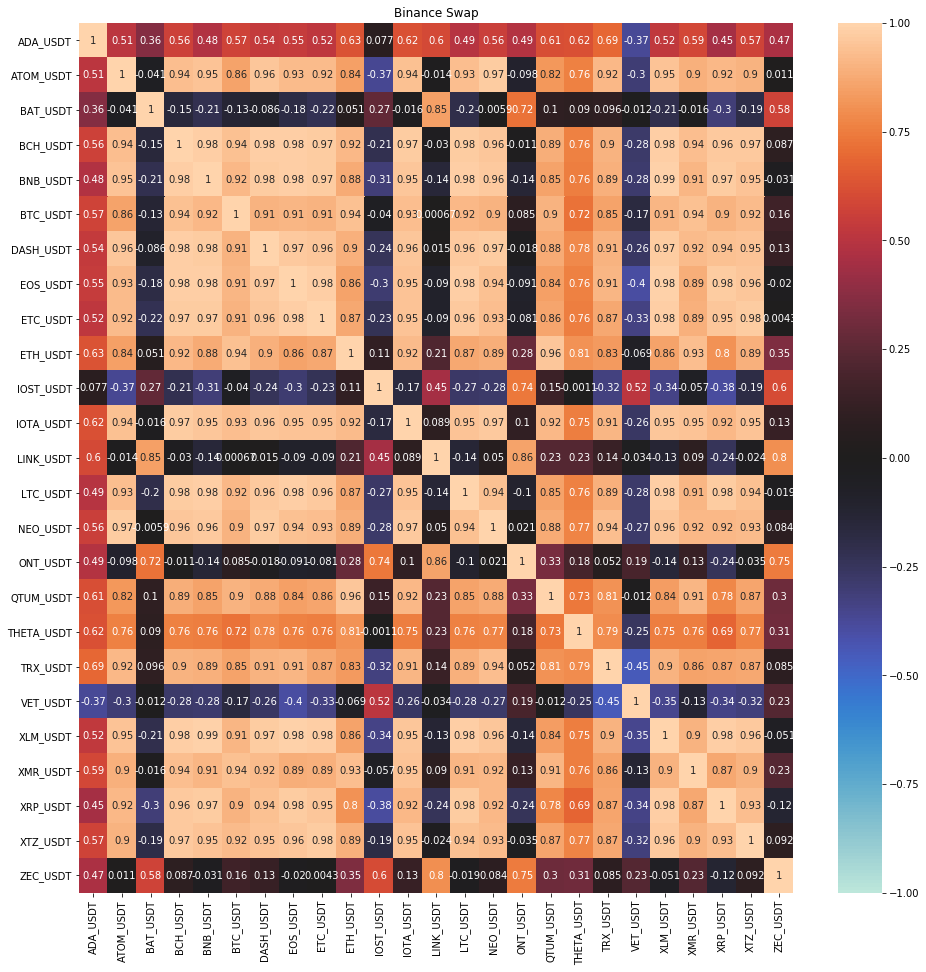

In [10]:
plot_corrs_in_exchange('Binance', 'Swap')

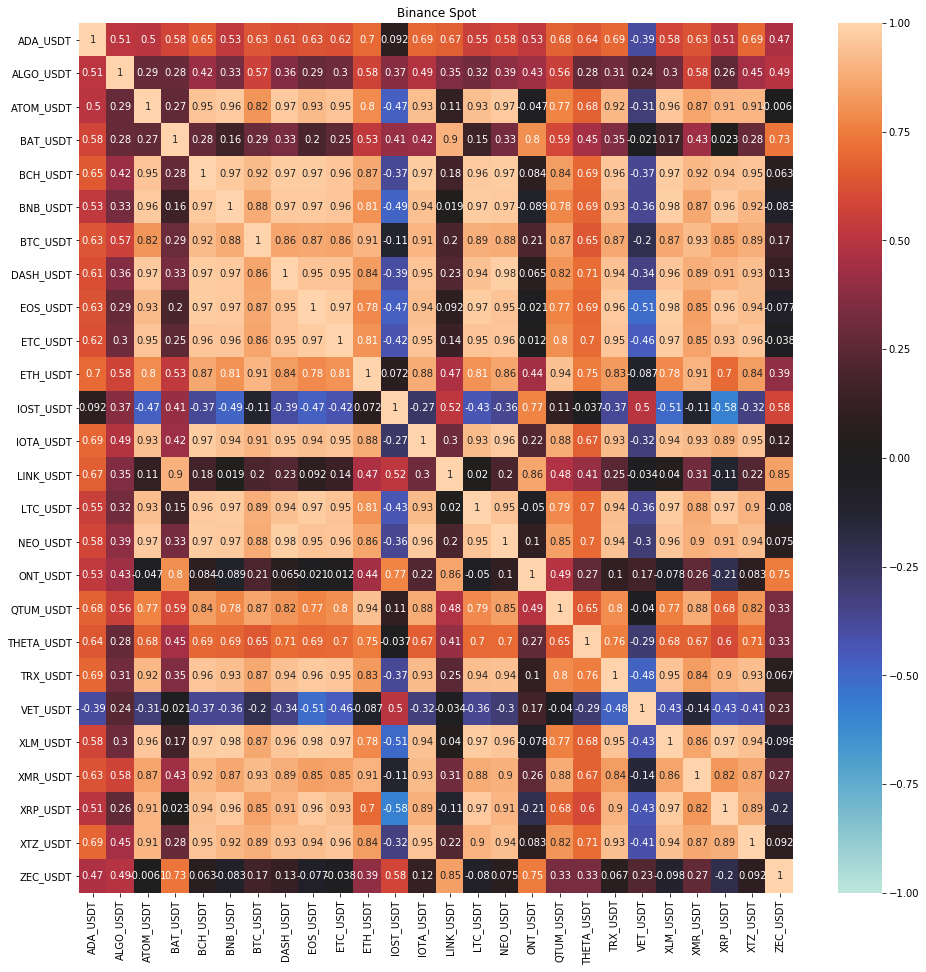

In [11]:
plot_corrs_in_exchange('Binance', 'Spot')

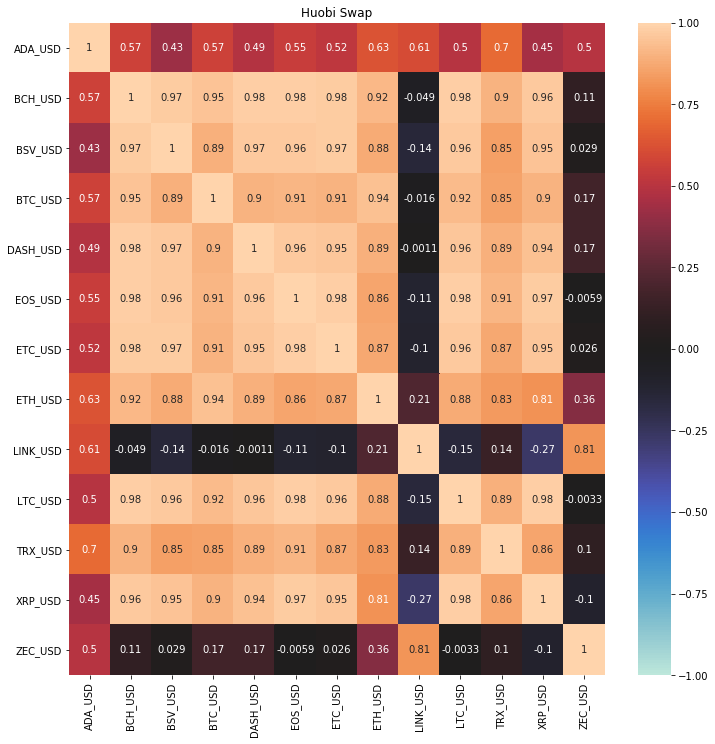

In [12]:
plot_corrs_in_exchange('Huobi', 'Swap', 12)

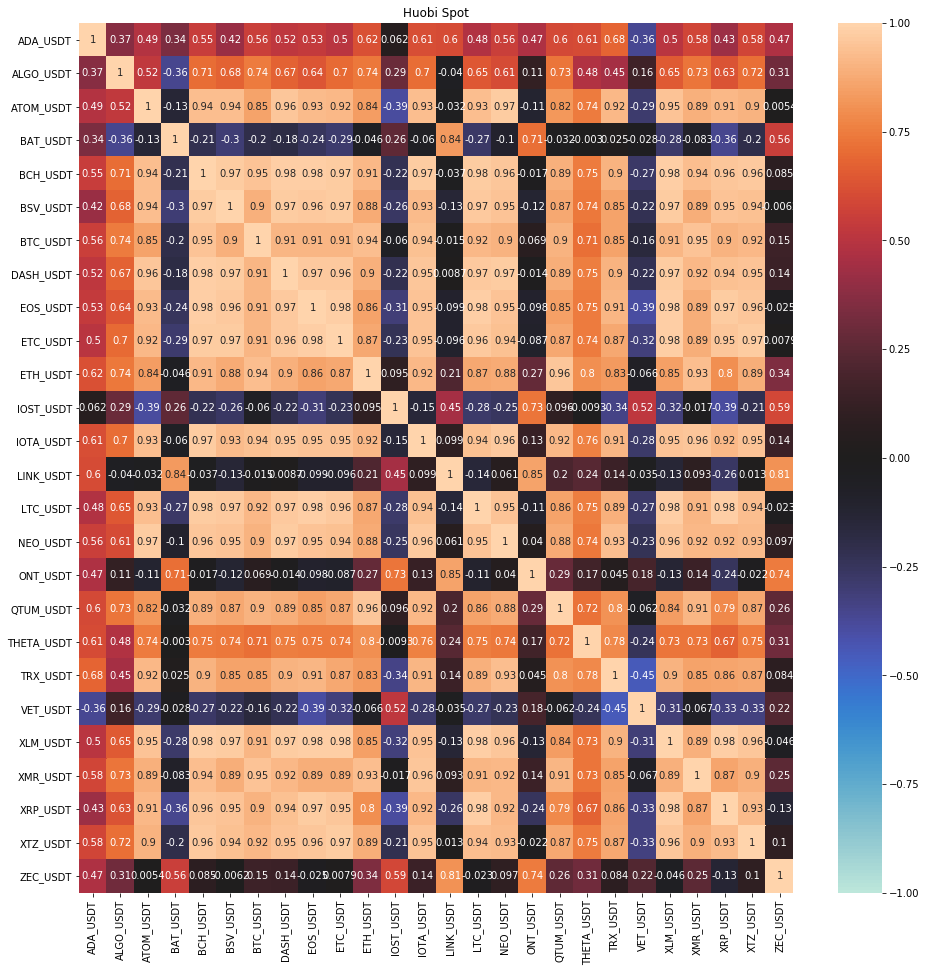

In [13]:
plot_corrs_in_exchange('Huobi', 'Spot')

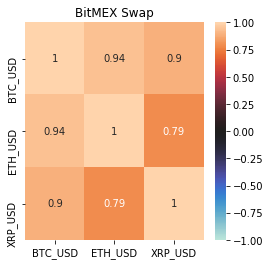

In [14]:
plot_corrs_in_exchange('BitMEX', 'Swap', 4)

## Plot correlations between different exchanges for the same pair

In [25]:
def plot_corrs_cross_exchanges(base: str, width: int=8)->None:
    df = prices_df.filter(regex=f'{base}_USD')

    fig, ax = plt.subplots(figsize=(width, width))
    sns.heatmap(df.corr(), annot = True, fmt='.2f', vmin=-1, vmax=1, center=0, ax=ax).set_title(base)

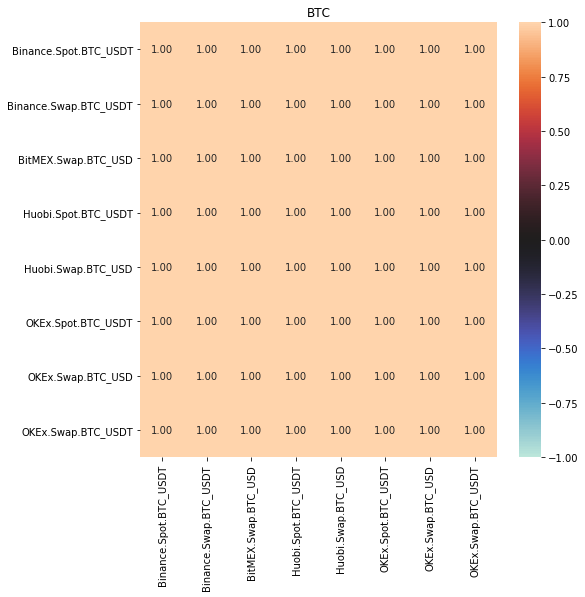

In [26]:
plot_corrs_cross_exchanges('BTC')

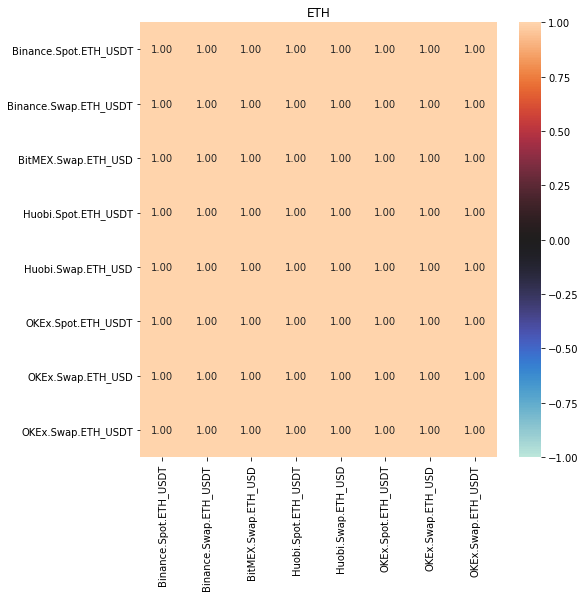

In [27]:
plot_corrs_cross_exchanges('ETH')

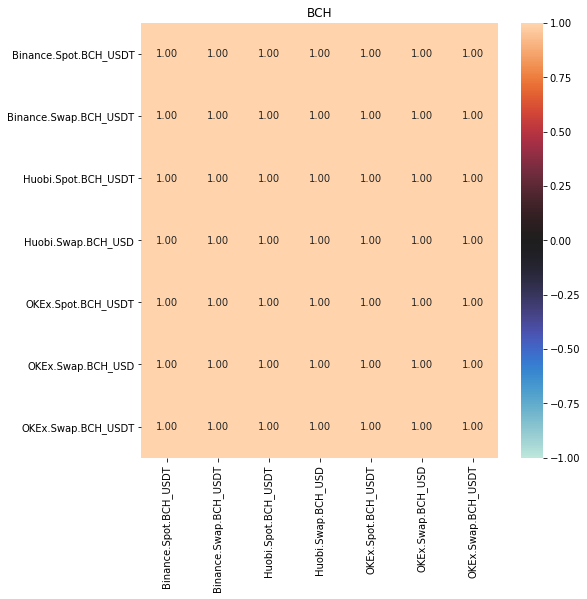

In [28]:
plot_corrs_cross_exchanges('BCH')

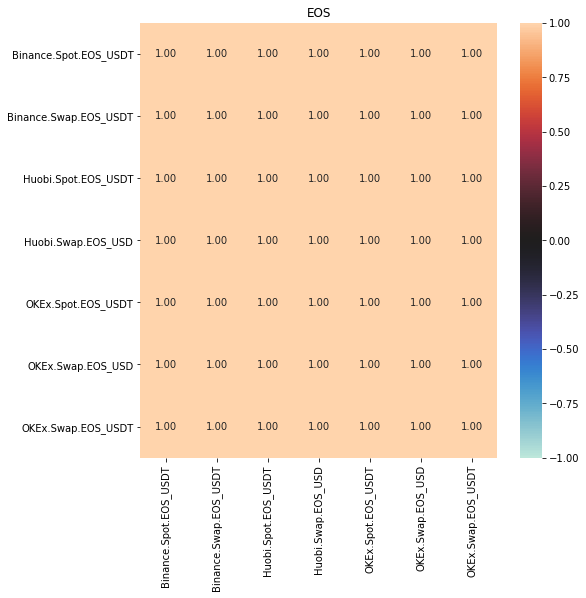

In [29]:
plot_corrs_cross_exchanges('EOS')

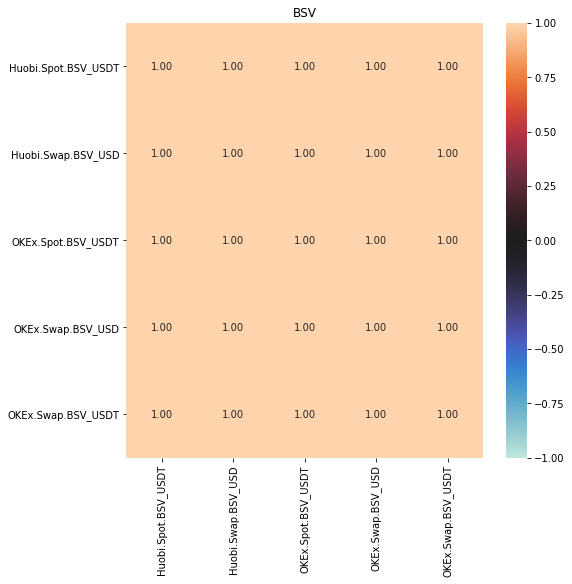

In [30]:
plot_corrs_cross_exchanges('BSV')

We can see that same trading pairs are highly synchronized between different exchanges.

## Sorting by correlations with BTC

In [20]:
prices_df.corr()['BitMEX.Swap.BTC_USD'].sort_values(ascending=False)[0:50]

BitMEX.Swap.BTC_USD       1.000000
OKEx.Swap.BTC_USD         0.999877
Huobi.Swap.BTC_USD        0.999838
OKEx.Spot.BTC_USDT        0.999667
Huobi.Spot.BTC_USDT       0.999662
OKEx.Swap.BTC_USDT        0.999650
Binance.Spot.BTC_USDT     0.999562
Binance.Swap.BTC_USDT     0.999540
OKEx.Swap.XMR_USD         0.964010
Huobi.Spot.XMR_USDT       0.945309
OKEx.Swap.BCH_USD         0.944475
Huobi.Swap.BCH_USD        0.944243
OKEx.Swap.BCH_USDT        0.943096
Huobi.Spot.BCH_USDT       0.942926
OKEx.Spot.BCH_USDT        0.942414
Binance.Swap.BCH_USDT     0.942169
Huobi.Spot.IOTA_USDT      0.940164
OKEx.Spot.XMR_USDT        0.940066
Binance.Swap.XMR_USDT     0.938896
BitMEX.Swap.ETH_USD       0.937974
OKEx.Swap.XTZ_USDT        0.937608
OKEx.Swap.ETH_USD         0.936816
Huobi.Swap.ETH_USD        0.936123
Binance.Swap.ETH_USDT     0.934626
OKEx.Swap.ETH_USDT        0.933760
OKEx.Spot.ETH_USDT        0.933581
Huobi.Spot.ETH_USDT       0.933342
Binance.Swap.IOTA_USDT    0.932715
OKEx.Spot.IOTA_USDT 

## References

* [Seaborn Heatmaps: 13 Ways to Customize Correlation Matrix Visualizations | by Okoh Anita](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07)
* [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)